In [5]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline
import math

# Accquire Data

In [6]:
#read the dataset. coulumn Churn whether the customer churned or not(Yes or No)
df1 = pd.read_csv('../data/WA_Fn-UseC-Telco-Customer-Churn.csv')

In [7]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df1.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#check if there is null value in the dataset
df1.isnull()
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
print("# of customers in original data:" +str(len(df1.index)))

# of customers in original data:7043


# Analiyzing Data: find churn rates related fields

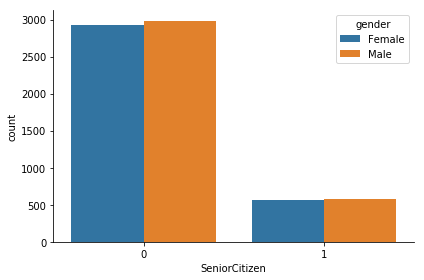

In [13]:
# seniors, non-seniors in the dataset. value 0: non-seniors, value 1: seniors
sns.countplot(x="SeniorCitizen", hue="gender",data=df1)
sns.despine()
plt.tight_layout()

In [14]:
#Display values for column Churn
df1.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
#count total numbers including Yes and No
total_number=df1.Churn.count()
print(total_number)

7043


In [16]:
total_yes = df1[df1['Churn'] == 'Yes']['Churn'].count()
print(total_yes)

1869


In [17]:
# churn rate
churn_rate= (total_yes/total_number)*100
churn_rate

26.536987079369588

In [18]:
seniors=df1[df1['SeniorCitizen'] == 1]
seniors.SeniorCitizen.value_counts()

1    1142
Name: SeniorCitizen, dtype: int64

In [19]:
seniors.Churn.value_counts()

No     666
Yes    476
Name: Churn, dtype: int64

In [20]:
# churn rate for senior people
senior_churn_rate=476/1142*100
senior_churn_rate

41.68126094570928

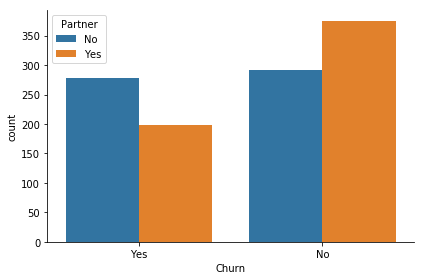

In [21]:
sns.countplot(x='Churn', hue="Partner", data=seniors)
sns.despine()
plt.tight_layout()

In [22]:
#customers are not seniors
non_senior=df1[df1['SeniorCitizen'] == 0]
non_senior.SeniorCitizen.value_counts()

0    5901
Name: SeniorCitizen, dtype: int64

In [23]:
#churn rate for non-seniors
non_senior.Churn.value_counts()

No     4508
Yes    1393
Name: Churn, dtype: int64

In [24]:
non_senior_churn= 1393/5901*100
non_senior_churn

23.606168446026096

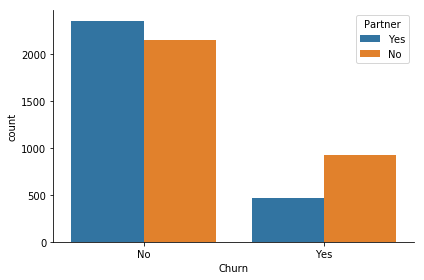

In [25]:
sns.countplot(x='Churn',hue="Partner", data=non_senior)
sns.despine()
plt.tight_layout()

In [26]:
#TechSupport related to churn rate
tech_support=df1[df1['TechSupport']=='Yes']
tech_support.TechSupport.value_counts()

Yes    2044
Name: TechSupport, dtype: int64

In [27]:
tech_support.Churn.value_counts()

No     1734
Yes     310
Name: Churn, dtype: int64

In [28]:
tech_churn=310/2044*100
tech_churn

15.166340508806261

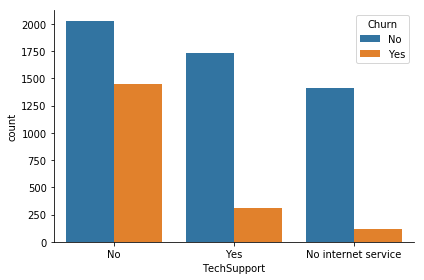

In [29]:
sns.countplot(x='TechSupport',hue="Churn", data=df1)
sns.despine()
plt.tight_layout()

In [30]:
#Contract related to churn rate: customers with month to month contract
month_contract=df1[df1['Contract']=='Month-to-month']
month_contract.Contract.value_counts()

Month-to-month    3875
Name: Contract, dtype: int64

In [31]:
#churn or not
month_contract.Churn.value_counts()

No     2220
Yes    1655
Name: Churn, dtype: int64

In [32]:
month_contract_churn=1655/3875*100
month_contract_churn

42.70967741935484

In [33]:
#customers with 1 yr contract
year_contract=df1[df1['Contract']=='One year']
year_contract.Contract.value_counts()

One year    1473
Name: Contract, dtype: int64

In [34]:
#churn or not
year_contract.Churn.value_counts()

No     1307
Yes     166
Name: Churn, dtype: int64

In [35]:
year_contract_churn=166/1473*100
year_contract_churn

11.269517990495586

In [36]:
#customers with 2yrs contract
two_years_contract=df1[df1['Contract']=='Two year']
two_years_contract.Contract.value_counts()

Two year    1695
Name: Contract, dtype: int64

In [37]:
#churn or not
two_years_contract.Churn.value_counts()

No     1647
Yes      48
Name: Churn, dtype: int64

In [38]:
two_years_contract_churn=48/1695*100
two_years_contract_churn

2.831858407079646

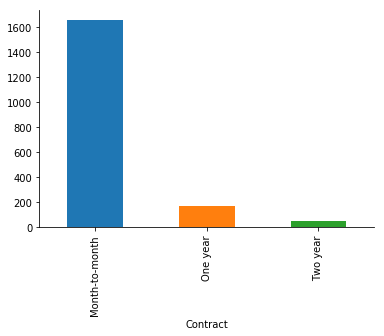

In [39]:
#contract relates to churn
by_contract=df1[df1["Churn"]=="Yes"].groupby("Contract")["Churn"].count()
by_contract.plot.bar()
sns.despine()

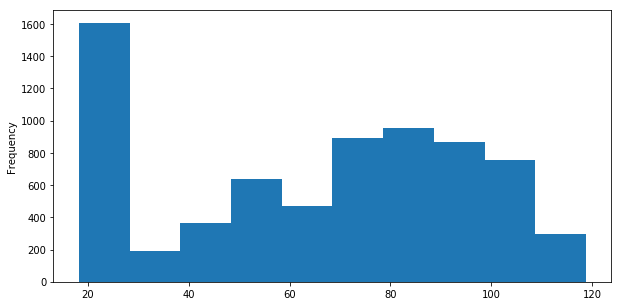

In [40]:
#MonthlyCharges for 7043 customers
df1["MonthlyCharges"].plot.hist(figsize=(10,5))

In [41]:
# MonthlyCharges greater than $65(mean)churned customers
by_monthlycharge =df1[(df1.MonthlyCharges>65)&(df1.Churn=="Yes")]
by_monthlycharge.Churn.value_counts()

Yes    1354
Name: Churn, dtype: int64

In [42]:
#Churn rate
by_monthlycharge.Churn.value_counts()/df1[df1['Churn'] == 'Yes']['Churn'].count()*100

Yes    72.445158
Name: Churn, dtype: float64

In [43]:
# MonthlyCharge less or equal $65 churn rate
by_monthlycharge1 =df1[(df1.MonthlyCharges<=65)&(df1.Churn=="Yes")]
by_monthlycharge1.Churn.value_counts()/df1[df1['Churn'] == 'Yes']['Churn'].count()*100

Yes    27.554842
Name: Churn, dtype: float64

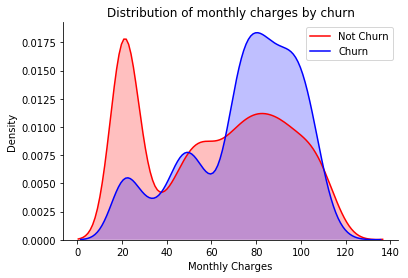

In [44]:
#Kernel density estimation for plotting the shape of a distribution of monthlycharge

ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
sns.despine()

In [45]:
#tenure greater than 32 month(mean)churn rate
by_tenure=df1[(df1.tenure > 32)&(df1.Churn=="Yes")]
by_tenure.Churn.value_counts()/df1[df1['Churn'] == 'Yes']['Churn'].count()*100

Yes    21.88336
Name: Churn, dtype: float64

In [46]:
#tenure less or equal 32 month(mean)churn rate
by_tenure1=df1[(df1.tenure <= 32)&(df1.Churn=="Yes")]
by_tenure1.Churn.value_counts()/df1[df1['Churn'] == 'Yes']['Churn'].count()*100


Yes    78.11664
Name: Churn, dtype: float64

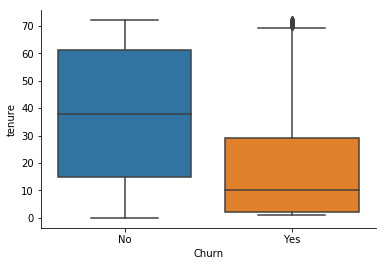

In [47]:
# visualizing the distrubition of churn rate relate to tenure
sns.boxplot(x = df1.Churn, y = df1.tenure)
sns.despine()

# Data Cleaning

In [48]:
#Remove some coulumns which will not be using for analyzing
df2=df1.drop(columns=['customerID','OnlineSecurity','OnlineBackup','MultipleLines', 'InternetService','DeviceProtection','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','TotalCharges'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,Contract,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No,Month-to-month,29.85,No
1,Male,0,No,No,34,Yes,No,One year,56.95,No
2,Male,0,No,No,2,Yes,No,Month-to-month,53.85,Yes
3,Male,0,No,No,45,No,Yes,One year,42.30,No
4,Female,0,No,No,2,Yes,No,Month-to-month,70.70,Yes


In [49]:
gender = {'Male': 1,'Female': 2} 

df2.gender = [gender[item] for item in df2.gender] 

In [50]:
partner = {'Yes': 1,'No': 0} 

df2.Partner = [partner[item] for item in df2.Partner] 

In [51]:
dependents = {'Yes': 1,'No': 0} 

df2.Dependents = [dependents[item] for item in df2.Dependents] 


In [52]:
phoneservice = {'Yes': 1,'No': 0} 

df2.PhoneService = [phoneservice[item] for item in df2.PhoneService] 

In [53]:
techsupport = {'Yes': 1,'No': 0, 'No internet service':2} 

df2.TechSupport = [techsupport[item] for item in df2.TechSupport]

In [54]:
contract = {'Month-to-month': 1,'One year': 2,'Two year':3} 

df2.Contract = [contract[item] for item in df2.Contract] 


In [55]:
churn = {'Yes': 1,'No': 0} 

df2.Churn = [churn[item] for item in df2.Churn] 

In [56]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,Contract,MonthlyCharges,Churn
0,2,0,1,0,1,0,0,1,29.85,0
1,1,0,0,0,34,1,0,2,56.95,0
2,1,0,0,0,2,1,0,1,53.85,1
3,1,0,0,0,45,0,1,2,42.30,0
4,2,0,0,0,2,1,0,1,70.70,1


# Build Model: Logistic Regression
Logistic regression is a statistical method for predicting binary classes.


In [57]:
x=df2.drop("Churn",axis=1)
y=df2["Churn"]


In [58]:
from sklearn.cross_validation import train_test_split

In [59]:
#Split data : 70% of data is training data and 30% of data is testing data.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel=LogisticRegression()

In [62]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
predictions=logmodel.predict(x_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
#Validate Model

classification_report(y_test,predictions)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1585
          1       0.62      0.54      0.58       528

avg / total       0.80      0.80      0.80      2113



In [66]:
from sklearn.metrics import confusion_matrix


In [67]:
#Use confusion_matrix to evaluate the model

confusion_matrix(y_test,predictions)

array([[1411,  174],
       [ 241,  287]])

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test, predictions)

0.8035967818267865

# Ending

In [1]:
weights = pd.Series(model.coef_[0],
                 index=x.columns.values)
weights.sort_values(ascending = False)

NameError: name 'pd' is not defined